In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set()

In [5]:
df = yf.download('TSLA', start='2018-03-23', end='2019-03-22')
df.to_csv('tesla_original.csv')
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2018-03-23 00:00:00+00:00,20.102667,20.102667,20.750000,20.030001,20.750000,99823500
2018-03-26 00:00:00+00:00,20.278667,20.278667,20.506001,19.424000,20.489332,125628000
2018-03-27 00:00:00+00:00,18.612000,18.612000,20.284666,18.478666,20.266666,208080000
2018-03-28 00:00:00+00:00,17.185333,17.185333,17.912001,16.806667,17.638666,315021000
2018-03-29 00:00:00+00:00,17.742001,17.742001,18.063999,16.547333,17.099333,227560500


## Transformations

following the 1st attempt trasnformation, this is to normalize the dataframe.

In [6]:
df.columns = df.columns.droplevel('Ticker') # run only once
df.columns = df.columns.rename(None) # drop price as a label
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-03-23 00:00:00+00:00,20.102667,20.102667,20.750000,20.030001,20.750000,99823500
2018-03-26 00:00:00+00:00,20.278667,20.278667,20.506001,19.424000,20.489332,125628000
2018-03-27 00:00:00+00:00,18.612000,18.612000,20.284666,18.478666,20.266666,208080000
2018-03-28 00:00:00+00:00,17.185333,17.185333,17.912001,16.806667,17.638666,315021000
2018-03-29 00:00:00+00:00,17.742001,17.742001,18.063999,16.547333,17.099333,227560500


In [8]:
df.index = pd.to_datetime(df.index).date

df.tail()

,Adj Close,Close,High,Low,Open,Volume
2019-03-15,18.362000,18.362000,18.914667,18.293333,18.900667,221782500
2019-03-18,17.966000,17.966000,18.536667,17.820000,18.400000,154215000
2019-03-19,17.831333,17.831333,18.219999,17.563999,17.833332,177009000
2019-03-20,18.240000,18.240000,18.331333,17.753332,17.979334,103623000
2019-03-21,18.268000,18.268000,18.430000,17.896667,18.173332,89206500


In [11]:
df = df.reset_index()
df.rename(columns={"index": "Date"}, inplace=True)

In [12]:
df.to_csv('tesla_formatted.csv')
df.head()

,Date,Date,Adj Close,Close,High,Low,Open,Volume
0,0,2018-03-23,20.102667,20.102667,20.750000,20.030001,20.750000,99823500
1,1,2018-03-26,20.278667,20.278667,20.506001,19.424000,20.489332,125628000
2,2,2018-03-27,18.612000,18.612000,20.284666,18.478666,20.266666,208080000
3,3,2018-03-28,17.185333,17.185333,17.912001,16.806667,17.638666,315021000
4,4,2018-03-29,17.742001,17.742001,18.063999,16.547333,17.099333,227560500


## Break, now we try the simulations.
- `df.Close.pct_change()`: Computes the fractional change from the immediately previous row by default. This is useful in comparing the fraction of change in a time series of elements.

In [13]:
df = pd.read_csv("tesla_formatted.csv")

In [14]:
returns = df.Close.pct_change()
volatility = returns.std()

- `number_simulation`: Specifies the number of simulated price paths (e.g., 100 different future price scenarios).
- `predict_day`: The number of days into the future to simulate prices (e.g., 30 days).
- `results`: An empty DataFrame to store the simulation results.

In each simulation, a new price is generated using: 
**Next Price = Current Price × (1 + Random Change)**

The random change is drawn from a normal distribution with mean = 0, and deviation = volatility.

In [17]:
number_simulation = 100
predict_day = 30
results = pd.DataFrame()

for i in range(number_simulation):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        prices.append(prices[d] * (1 + np.random.normal(0, volatility)))
    results[i] = pd.Series(prices).values

results.head() # cada coluna e uma sequencia temporal ao longo da linha

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000,...,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000,18.268000
1,18.290366,17.740112,19.925729,18.587052,18.870965,18.484798,18.522525,17.309111,18.239557,16.996964,...,18.500406,18.679255,17.598727,17.514634,18.051618,18.638237,18.877721,19.334398,18.910235,16.603958
2,19.000442,18.205934,19.263863,18.056052,18.440236,18.887732,18.483738,16.852229,17.779433,17.866658,...,18.674286,18.291547,16.492412,17.845379,17.479433,18.755790,18.969447,19.362039,18.874045,14.584064
3,18.647308,18.246095,19.256870,18.406454,19.274770,19.851883,17.891540,17.352814,18.100182,18.773195,...,18.503764,18.632949,15.682947,18.712174,18.646220,18.889091,20.370349,18.836956,18.252201,14.890617
4,18.583341,16.893368,19.533129,18.644122,18.215316,22.119078,18.251301,18.004450,18.018036,18.125896,...,20.489309,16.962313,14.448568,20.033036,17.710748,18.125344,21.425773,19.167387,18.977695,16.189456


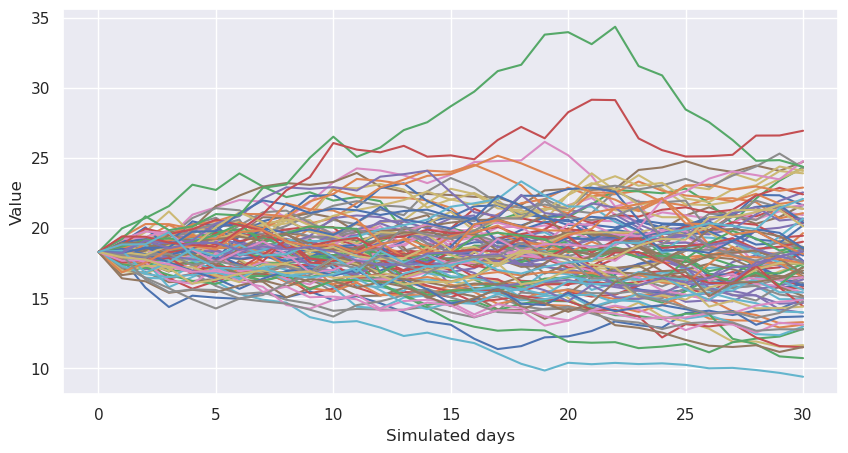

In [16]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

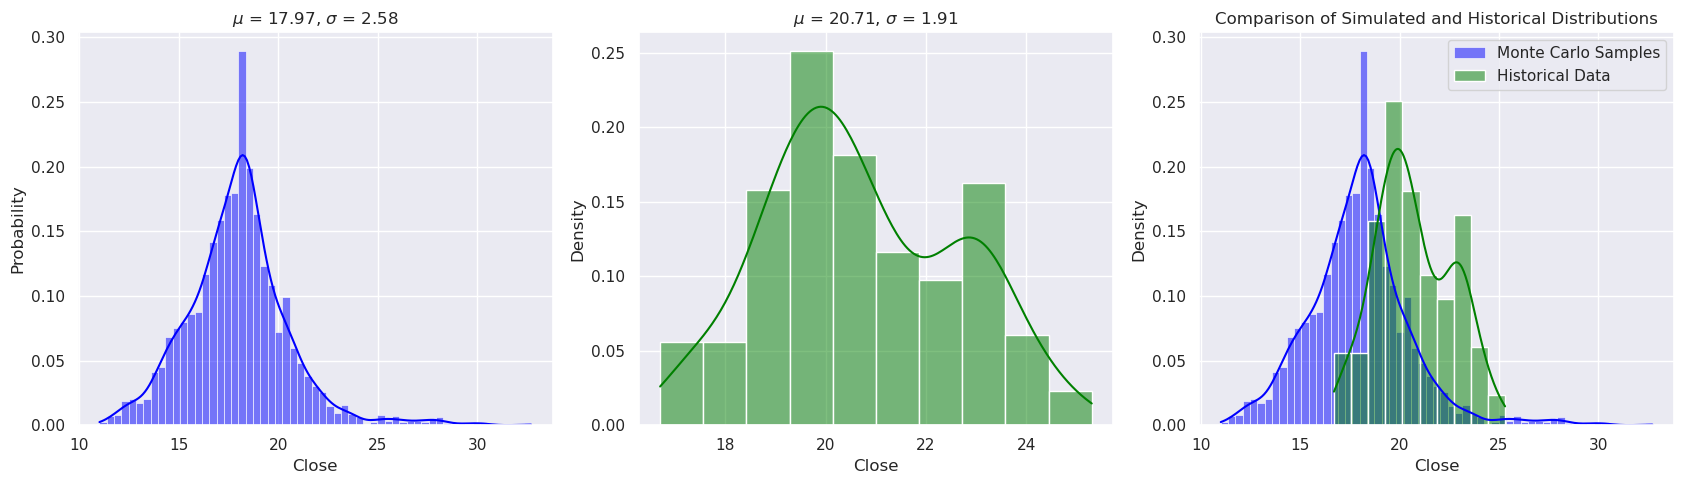

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ravel and sort the Monte Carlo simulation results
raveled = results.values.ravel() # Return the flattened underlying data as an ndarray or ExtensionArray.
raveled.sort()

# Create the plots
plt.figure(figsize=(17, 5))

# Plot 1: Distribution of Monte Carlo samples
plt.subplot(1, 3, 1)
sns.histplot(raveled, kde=True, stat="density", color="blue")
plt.xlabel('Close')
plt.ylabel('Probability')
plt.title(r'$\mu$ = %.2f, $\sigma$ = %.2f' % (raveled.mean(), raveled.std()))

# Plot 2: Distribution of historical close prices
plt.subplot(1, 3, 2)
sns.histplot(df.Close, kde=True, stat="density", color="green")
plt.title(r'$\mu$ = %.2f, $\sigma$ = %.2f' % (df.Close.mean(), df.Close.std()))

# Plot 3: Compare Monte Carlo and historical distributions
plt.subplot(1, 3, 3)
sns.histplot(raveled, kde=True, stat="density", color="blue", label='Monte Carlo Samples')
sns.histplot(df.Close, kde=True, stat="density", color="green", label='Historical Data')
plt.legend()
plt.title('Comparison of Simulated and Historical Distributions')

# Show the plots
plt.tight_layout()
plt.show()



### **Left Plot: Monte Carlo Simulation Distribution**
- **What it shows**:
  - This plot displays the distribution of the simulated future prices (`raveled`), generated using Monte Carlo simulation.
  - The **x-axis** represents the simulated prices, while the **y-axis** shows the probability density.

- **Key Insights**:
  - The blue histogram shows the simulated prices.
  - The black line represents the kernel density estimate (KDE), providing a smooth approximation of the distribution.
  - The mean (\(\mu = 17.97\)) indicates the average simulated price.
  - The standard deviation (\(\sigma = 2.58\)) reflects the variability in the simulated prices.
  - **Takeaway**: Most simulated prices are clustered around the mean (\(17.97\)), with some deviation, showing the potential range of future outcomes.

---

### **Middle Plot: Historical Price Distribution**
- **What it shows**:
  - This plot depicts the distribution of historical closing prices (`df.Close`).
  - The **x-axis** represents the historical prices, and the **y-axis** shows the density.

- **Key Insights**:
  - The green histogram represents the actual closing prices.
  - The black line is the KDE of the historical data.
  - The mean (\(\mu = 20.71\)) represents the average historical price.
  - The standard deviation (\(\sigma = 1.91\)) indicates the variability in historical prices.
  - **Takeaway**: Historical prices are centered around \(20.71\), with less variability compared to the simulated prices.

---

### **Right Plot: Comparison of Simulated and Historical Distributions**
- **What it shows**:
  - This plot overlays the distributions of Monte Carlo simulated prices (blue) and historical closing prices (green).
  - The **x-axis** represents the price values, and the **y-axis** shows the density.

- **Key Insights**:
  - The blue histogram (and KDE) represents simulated future prices, while the green histogram (and KDE) shows historical prices.
  - **Difference in means**: Simulated prices (\(\mu = 17.97\)) are lower than historical prices (\(\mu = 20.71\)), suggesting that the Monte Carlo model anticipates potential downward movement or is influenced by recent trends.
  - **Difference in variability**: Simulated prices have a higher standard deviation (\(\sigma = 2.58\)) than historical prices (\(\sigma = 1.91\)), reflecting more uncertainty in future price predictions.
  - **Overlap**: The overlap between the distributions indicates consistency in some parts, but deviations in others highlight differences between past behavior and future expectations.

---

### **General Interpretation**:
- **Monte Carlo Predictions**:
  - The simulation models potential future price paths based on historical volatility.
  - It anticipates a broader range of possible outcomes (higher standard deviation), capturing the uncertainty in future predictions.

- **Comparison with Historical Data**:
  - The historical data suggests that the asset's past prices were more stable and centered around a higher average price.
  - The Monte Carlo simulation introduces more variability, emphasizing possible downside risk while maintaining some overlap with historical behavior.

- **Practical Use**:
  - These plots can help investors or analysts understand the range of possible future prices and compare them with past trends.
  - The insights are useful for risk assessment, hedging, or setting realistic expectations for future performance.